## **Connect to Kaggle**



In [6]:
! pip install kaggle
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json 
# Allocate the required permission for this file

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Downloading & Extract Dataset**



In [7]:
! kaggle datasets download ilhamyp/usg-kidney

 95% 8.00M/8.40M [00:01<00:00, 12.6MB/s]
100% 8.40M/8.40M [00:01<00:00, 7.96MB/s]


In [8]:
! unzip usg-kidney.zip -d datasets/

Archive:  usg-kidney.zip
  inflating: datasets/dataset_usg/testing/Batu_Ginjal/bg_1.jpg  
  inflating: datasets/dataset_usg/testing/Batu_Ginjal/bg_10.jpg  
  inflating: datasets/dataset_usg/testing/Batu_Ginjal/bg_11.jpg  
  inflating: datasets/dataset_usg/testing/Batu_Ginjal/bg_2.jpg  
  inflating: datasets/dataset_usg/testing/Batu_Ginjal/bg_3.jpg  
  inflating: datasets/dataset_usg/testing/Batu_Ginjal/bg_4.jpg  
  inflating: datasets/dataset_usg/testing/Batu_Ginjal/bg_5.jpg  
  inflating: datasets/dataset_usg/testing/Batu_Ginjal/bg_6.jpg  
  inflating: datasets/dataset_usg/testing/Batu_Ginjal/bg_7.jpg  
  inflating: datasets/dataset_usg/testing/Batu_Ginjal/bg_8.jpg  
  inflating: datasets/dataset_usg/testing/Batu_Ginjal/bg_9.jpg  
  inflating: datasets/dataset_usg/testing/Normal/n_1.jpg  
  inflating: datasets/dataset_usg/testing/Normal/n_10.jpg  
  inflating: datasets/dataset_usg/testing/Normal/n_11.jpg  
  inflating: datasets/dataset_usg/testing/Normal/n_12.jpg  
  inflating: datase

## **Fast A.I**

In [ ]:
#Start Train
!pip install fastai==1.0.61
!pip install torch==1.4.0 torchvision==0.5.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.2/239.2 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.2/355.2 KB 20.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19190 sha256=96d698d20c4522481384549091b298503ad9386fa2ce6984ac9faa7eb94a7102
  Stored in directory: /root/.cache/pip/wheels/b9/b1/68/cb4feab29709d4155310d29a421389665dcab9eb3b679b527b
Successfully built nvidia-ml-py3
  Attempting uninstall: fastai
    Found existing installation: fastai 2.7.10
    Uninstalling fastai-2.7.10:
      Successfully uninstalled fastai-2.7.10
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.4/753.4 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 

In [ ]:
from PIL import Image
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/content/datasets/dataset_usg/training'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/datasets/dataset_usg/training/Normal/GinjalNormal (47).jpg
/content/datasets/dataset_usg/training/Normal/GinjalNormal (5).jpg
/content/datasets/dataset_usg/training/Normal/GinjalNormal (18).jpg
/content/datasets/dataset_usg/training/Normal/GinjalNormal (14).jpg
/content/datasets/dataset_usg/training/Normal/GinjalNormal (56).jpg
/content/datasets/dataset_usg/training/Normal/GinjalNormal (51).jpg
/content/datasets/dataset_usg/training/Normal/GinjalNormal (23).jpg
/content/datasets/dataset_usg/training/Normal/GinjalNormal (61).jpg
/content/datasets/dataset_usg/training/Normal/GinjalNormal (9).jpg
/content/datasets/dataset_usg/training/Normal/GinjalNormal (57).jpg
/content/datasets/dataset_usg/training/Normal/GinjalNormal (44).jpg
/content/datasets/dataset_usg/training/Normal/GinjalNormal (70).jpg
/content/datasets/dataset_usg/training/Normal/GinjalNormal (58).jpg
/content/datasets/dataset_usg/training/Normal/GinjalNormal (17).jpg
/content/datasets/dataset_usg/training/Normal/Ginj

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

In [ ]:
from fastai import *
from fastai.vision import *
from fastai.imports import *

path = Path("/content/datasets/dataset_usg/training")
classes = ['Batu_Ginjal', 'Normal']

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(do_flip=True,flip_vert=False,max_rotate=10), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
data.classes

['Batu_Ginjal', 'Normal']

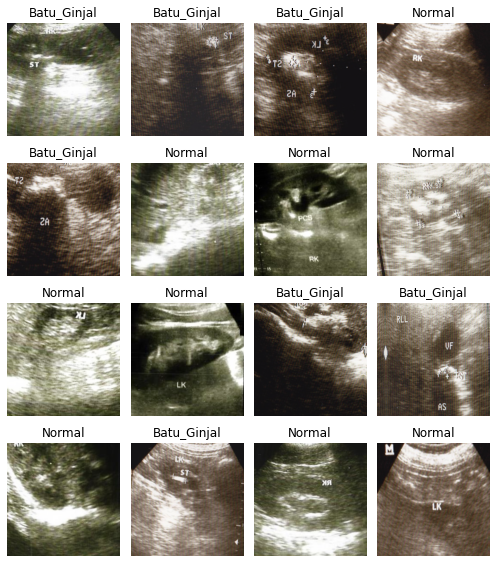

In [ ]:
data.show_batch(rows=4, figsize=(7,8))

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=[error_rate, accuracy])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [ ]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.470827,0.328165,0.181818,0.818182,00:27


In [ ]:
learn.model_dir='/content/Project file' 
learn.save("stage_2.kidney")

In [ ]:
learn.load('/content/stage_2.kidney.pth')

In [ ]:
learn.export('model_kidney_stone_classification_2.pkl')

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.197667,0.754767,0.181818,0.818182,00:37
1,0.219894,1.021359,0.181818,0.818182,00:40


In [ ]:
learn.model_dir='/content/Project file' 
learn.save("stage_02.bee_wasp")

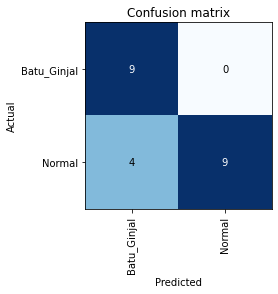

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
#Exp .pt
torch.save(learn.model.state_dict(), path/'model_kidney_stone_classification.pt')
#Exp .pkl
learn.export('model_kidney_stone_classification_2.pkl')

## **Pytorch Chat GPT**

In [9]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

# Load the data
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train = '/content/datasets/dataset_usg/training'
test = '/content/datasets/dataset_usg/testing'

train_dataset = torchvision.datasets.ImageFolder(train, transform=transform)
test_dataset = torchvision.datasets.ImageFolder(test, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the model
model = torchvision.models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Train the model
for epoch in range(20):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print('Epoch %d loss: %.3f' % (epoch + 1, running_loss / len(train_loader)))

print('Finished Training')

# Test the model
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy on test images: %d %%' % (100 * correct / total))


/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

Epoch 1 loss: 0.758
Epoch 2 loss: 0.533
Epoch 3 loss: 0.333
Epoch 4 loss: 0.243
Epoch 5 loss: 0.175
Epoch 6 loss: 0.144
Epoch 7 loss: 0.115
Epoch 8 loss: 0.076
Epoch 9 loss: 0.069
Epoch 10 loss: 0.042
Epoch 11 loss: 0.036
Epoch 12 loss: 0.032
Epoch 13 loss: 0.033
Epoch 14 loss: 0.036
Epoch 15 loss: 0.026
Epoch 16 loss: 0.015
Epoch 17 loss: 0.015
Epoch 18 loss: 0.016
Epoch 19 loss: 0.013
Epoch 20 loss: 0.020
Finished Training
Accuracy on test images: 88 %
